In [3]:
library(tidyverse)
library(car)

Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some




### Filter and rename genomes in analysis

In [4]:
# meta_data <- read.delim("/home/tim/project/GTDB_TREE/alignment/raw_r220/bac120_metadata_r220.tsv",row.names = NULL,sep = "\t")

In [5]:
# colnames(meta_data)

In [6]:
# library(ape)
# keep_species <- read.tree("/home/tim/project/GTDB_TREE/data/r220/bac120_r220.tree")$tip.label
# meta_data <- meta_data %>% mutate(accession = str_replace(accession, ".*_(\\d+)\\.\\d+", "G\\1"))
# meta_data <- meta_data %>% filter(accession %in% keep_species)
# meta_data <- meta_data %>% select(accession, checkm_strain_heterogeneity, coding_density, gc_percentage, genome_size, 
#                                   gtdb_taxonomy, gtdb_type_designation_ncbi_taxa, gtdb_type_designation_ncbi_taxa_sources, 
#                                   ncbi_assembly_level, ncbi_assembly_name, ncbi_assembly_type, ncbi_bioproject, ncbi_biosample, 
#                                   ncbi_genbank_assembly_accession, ncbi_isolation_source, ncbi_taxid, ncbi_taxonomy, 
#                                   ncbi_taxonomy_unfiltered, ncbi_translation_table)

# # Rename the accession column to ID and write to a TSV file
# meta_data %>%
#   rename(ID = "accession") %>%
#   write.table("/home/tim/project/GTDB_TREE/data/r220/filtered_genome_info.tsv", 
#               sep = "\t", row.names = FALSE, quote = FALSE)

### Mapping GTDB taxanomy information

In [7]:
filtered_meta_data <- read.delim("/home/tim/project/GTDB_TREE/data/r220/filtered_genome_info.tsv",row.names = NULL,sep = "\t")

In [8]:
# converting columns ncbi_assembly_level ncbi_assembly_type ncbi_isolation_source ncbi_translation_table to factors
filtered_meta_data$ncbi_assembly_level <- as.factor(filtered_meta_data$ncbi_assembly_level)
filtered_meta_data$ncbi_assembly_type <- as.factor(filtered_meta_data$ncbi_assembly_type)
filtered_meta_data$ncbi_isolation_source <- as.factor(filtered_meta_data$ncbi_isolation_source)
filtered_meta_data$ncbi_translation_table <- as.factor(filtered_meta_data$ncbi_translation_table)
# covnerting columns checkm_strain_heterogeneity, coding_density, gc_percentage to numeric
filtered_meta_data$checkm_strain_heterogeneity <- as.numeric(filtered_meta_data$checkm_strain_heterogeneity)
filtered_meta_data$coding_density <- as.numeric(filtered_meta_data$coding_density)
filtered_meta_data$gc_percentage <- as.numeric(filtered_meta_data$gc_percentage)

In [9]:
summary(filtered_meta_data)

      ID            checkm_strain_heterogeneity coding_density  gc_percentage  
 Length:107186      Min.   :  0.00              Min.   :33.03   Min.   :13.86  
 Class :character   1st Qu.:  0.00              1st Qu.:87.89   1st Qu.:40.94  
 Mode  :character   Median :  0.00              Median :89.93   Median :50.89  
                    Mean   : 16.81              Mean   :89.66   Mean   :50.96  
                    3rd Qu.: 25.00              3rd Qu.:91.71   3rd Qu.:61.74  
                    Max.   :100.00              Max.   :97.56   Max.   :77.02  
                                                                               
  genome_size       gtdb_taxonomy      gtdb_type_designation_ncbi_taxa
 Min.   :  200477   Length:107186      Length:107186                  
 1st Qu.: 1928306   Class :character   Class :character               
 Median : 2833540   Mode  :character   Mode  :character               
 Mean   : 3218172                                                     
 3rd 

In [10]:
taxanomy_table <- read.delim("/home/tim/project/GTDB_TREE/data/r220/rep_bac120_taxonomy.tsv",row.names = NULL,sep = "\t")

In [11]:
filtered_meta_data <- left_join(filtered_meta_data, taxanomy_table, by = c("ID" = "ID")) %>% 
    rename(GTDB_Domain = "Domain", GTDB_Phylum = "Phylum", GTDB_Class = "Class", GTDB_Order = "Order", GTDB_Family = "Family", GTDB_Genius = "Genius", GTDB_Species = "Species")

In [12]:
numeric_stat_all_phylum <- filtered_meta_data %>% 
    group_by(GTDB_Phylum) %>% 
    summarise(mean_coding_density = mean(coding_density, na.rm = TRUE), mean_gc_percentage = mean(gc_percentage, na.rm = TRUE), 
                 mean_genome_size = mean(genome_size, na.rm = TRUE)) %>% 
    ungroup() %>% 
    mutate(GTDB_Phylum = str_remove(GTDB_Phylum, "^p__"))

In [13]:
selected_phylum <- readLines("/home/tim/project/GTDB_TREE/data/GTDB_stable_phyla_list.txt")
numeric_stat_stable_phylum <- numeric_stat_all_phylum %>% 
    filter(GTDB_Phylum %in% selected_phylum)
numeric_stat_stable_phylum

GTDB_Phylum,mean_coding_density,mean_gc_percentage,mean_genome_size
<chr>,<dbl>,<dbl>,<dbl>
Acidobacteriota,89.72716,59.89969,4487419.1
Actinomycetota,90.00595,65.41396,4144176.5
Aquificota,94.59594,40.86890,1512116.0
Bipolaricaulota,90.44077,60.28244,1663482.4
Caldisericota,91.97189,43.67966,1483375.6
Chlamydiota,90.37765,41.76299,1786360.3
Chloroflexota,89.27755,58.21166,3339819.1
Cloacimonadota,90.15420,41.25514,2363291.3
Cyanobacteriota,87.05005,41.95586,3599459.8


In [14]:
PCA_Q_componemt <- read.csv("/home/tim/project/GTDB_TREE/analysis/model_and_genome/PCA_Q_components_trained_pname.csv")
PCA_and_features <- left_join(numeric_stat_stable_phylum, PCA_Q_componemt, by = c("GTDB_Phylum" = "Model"))

In [15]:
PCA_and_features %>% write.csv("/home/tim/project/GTDB_TREE/analysis/model_and_genome/genome_numeric_stat_with_PCA.csv", row.names = FALSE)

In [16]:
# Calculate Variance Inflation Factors (VIF)
model_data <- PCA_and_features %>% select(mean_coding_density, mean_gc_percentage, mean_genome_size)
vif_values <- vif(lm(mean_coding_density ~ ., data = model_data))

# Print VIF values
print(vif_values)

mean_gc_percentage   mean_genome_size 
          1.454009           1.454009 


In [17]:
# Define a function to perform multiple linear regression, calculate VIF and residuals
model_summary <- function(data, response_vars) {
  # Initialize an empty list to store results
  results <- list()

  # Loop through each response variable
  for (response_var in response_vars) {
    formula <- as.formula(paste(response_var, "~ PC1 + PC2"))
    model <- lm(formula, data = data)
    
    # Calculate statistics
    r_squared <- summary(model)$r.squared
    vif_values <- vif(model)
    sum_residuals <- sum(residuals(model))
    
    # Store results in the list
    results[[response_var]] <- c(r_squared, vif_values, sum_residuals)
  }
  
  # Combine results into a data frame and transpose
  results_df <- as.data.frame(do.call(rbind, results))
  colnames(results_df) <- c("R2", "VIF_PC1", "VIF_PC2","sum_res")
  
  return(results_df)
}

# Apply the function to your data
response_variables <- c("mean_coding_density", "mean_gc_percentage", "mean_genome_size")
summary_table <- model_summary(PCA_and_features, response_variables)

# Print the summary table
print(summary_table)

                           R2 VIF_PC1 VIF_PC2       sum_res
mean_coding_density 0.3063828       1       1 -4.857226e-16
mean_gc_percentage  0.9502474       1       1 -2.609024e-15
mean_genome_size    0.6219272       1       1  1.367880e-09


In [18]:
# Define a function to perform multiple linear regression, calculate VIF and residuals
model_summary <- function(data, response_vars) {
  # Initialize an empty list to store results
  results <- list()

  # Loop through each response variable
  for (response_var in response_vars) {
    formula <- as.formula(paste(response_var, "~ PC1 + PC2 + PC3 + PC4 + PC5"))
    model <- lm(formula, data = data)
    
    # Calculate statistics
    r_squared <- summary(model)$r.squared
    vif_values <- vif(model)
    sum_residuals <- sum(residuals(model))
    
    # Store results in the list
    results[[response_var]] <- c(r_squared, vif_values, sum_residuals)
  }
  
  # Combine results into a data frame and transpose
  results_df <- as.data.frame(do.call(rbind, results))
  colnames(results_df) <- c("R2", "VIF_PC1", "VIF_PC2", "VIF_PC3", "VIF_PC4", "VIF_PC5", "sum_res")
  
  return(results_df)
}

# Apply the function to your data
response_variables <- c("mean_coding_density", "mean_gc_percentage", "mean_genome_size")
summary_table <- model_summary(PCA_and_features, response_variables)

# Print the summary table
print(summary_table)

                           R2 VIF_PC1 VIF_PC2 VIF_PC3 VIF_PC4 VIF_PC5
mean_coding_density 0.5011659       1       1       1       1       1
mean_gc_percentage  0.9699507       1       1       1       1       1
mean_genome_size    0.6677998       1       1       1       1       1
                         sum_res
mean_coding_density 5.828671e-16
mean_gc_percentage  1.276756e-15
mean_genome_size    1.928129e-09


Correlation computed with
• Method: 'pearson'
• Missing treated using: 'pairwise.complete.obs'


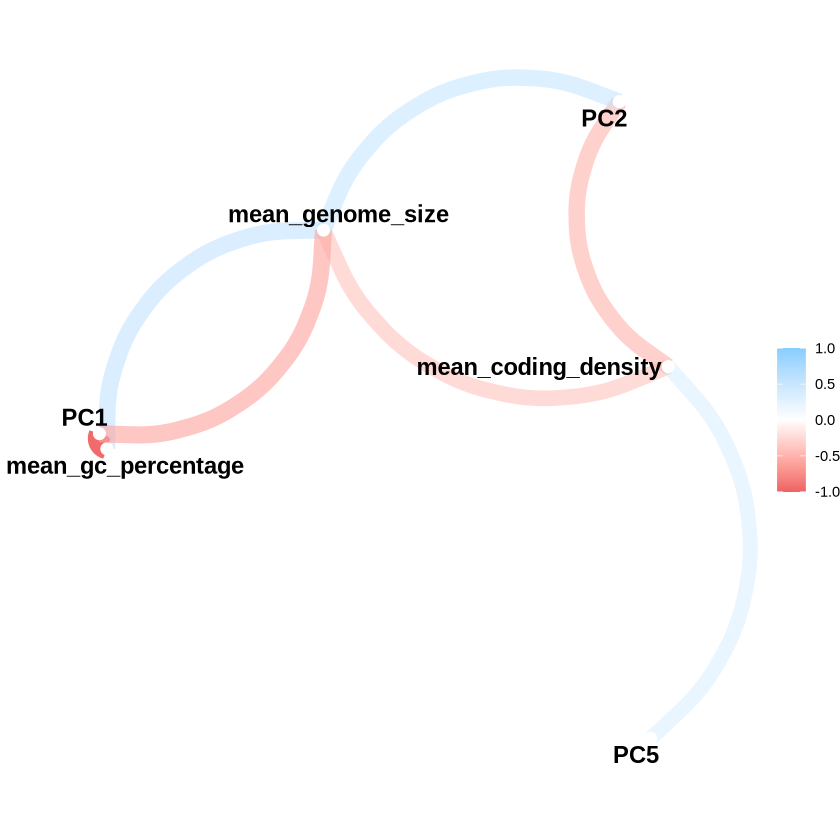

In [19]:
library(tidyverse)
library(corrr)
library(ggplot2)

corr_matrix <- PCA_and_features %>%
  select(-GTDB_Phylum, -PC3, -PC4, -PC6, -PC7, -PC8, -PC9, -PC10) %>% 
  correlate() 

corr_matrix_depend <- corr_matrix %>% select(term, mean_coding_density, mean_gc_percentage, mean_genome_size) %>% 
  filter(startsWith(corr_matrix$term, "PC"))

corr_matrix %>% 
  network_plot(min_cor = .3)


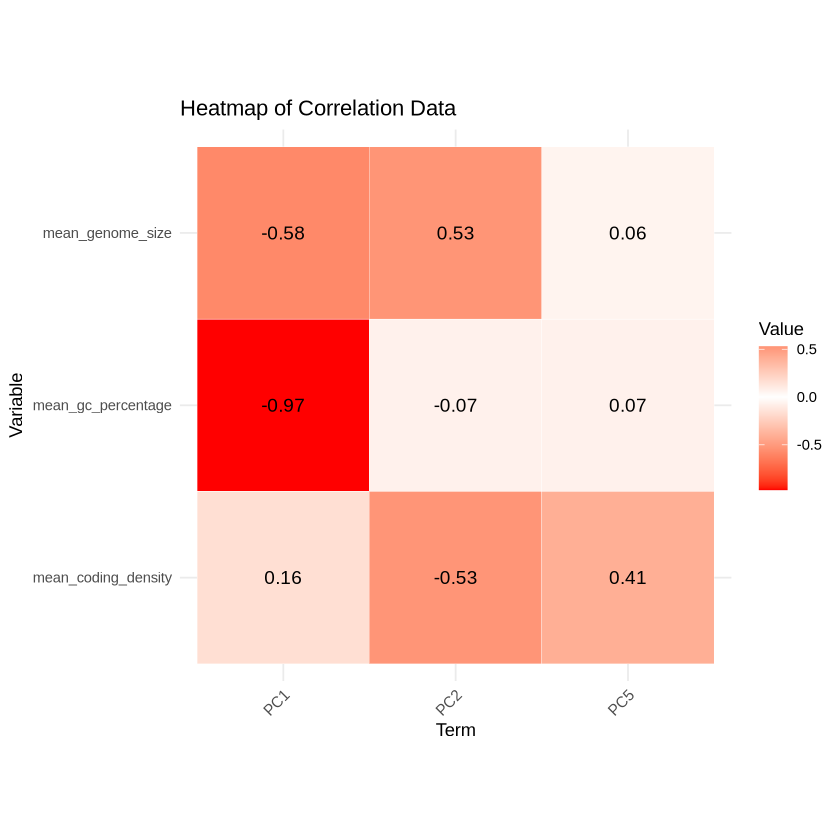

In [20]:
library(tidyverse)

# Assuming `corr_matrix_depend` is a data frame with a column named `term` and other columns representing variables
corr_long <- corr_matrix_depend %>%
  pivot_longer(cols = -term, names_to = "variable", values_to = "value")

ggplot(corr_long, aes(x = term, y = variable, fill = value)) +
  geom_tile(color = "white") +
  scale_fill_gradient2(low = "red", mid = "white", high = "red", midpoint = 0) +
  theme_minimal() +
  theme(axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1)) +
  labs(title = "Heatmap of Correlation Data", x = "Term", y = "Variable", fill = "Value") +
  geom_text(aes(label = round(value, 2)), color = "black", size = 4) +
  coord_fixed()

Rows: 25 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): GTDB_Phylum
dbl (13): mean_coding_density, mean_gc_percentage, mean_genome_size, PC1, PC...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


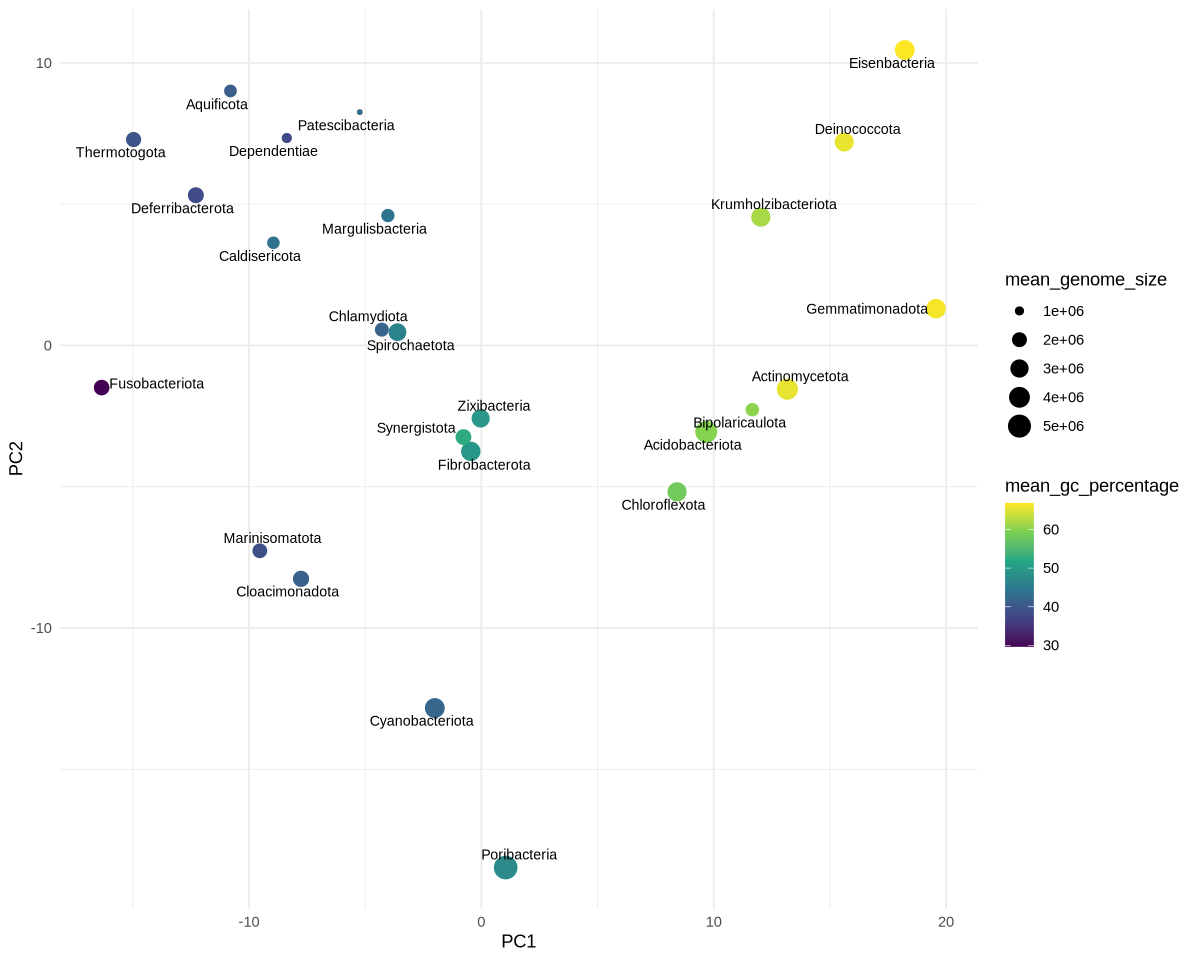

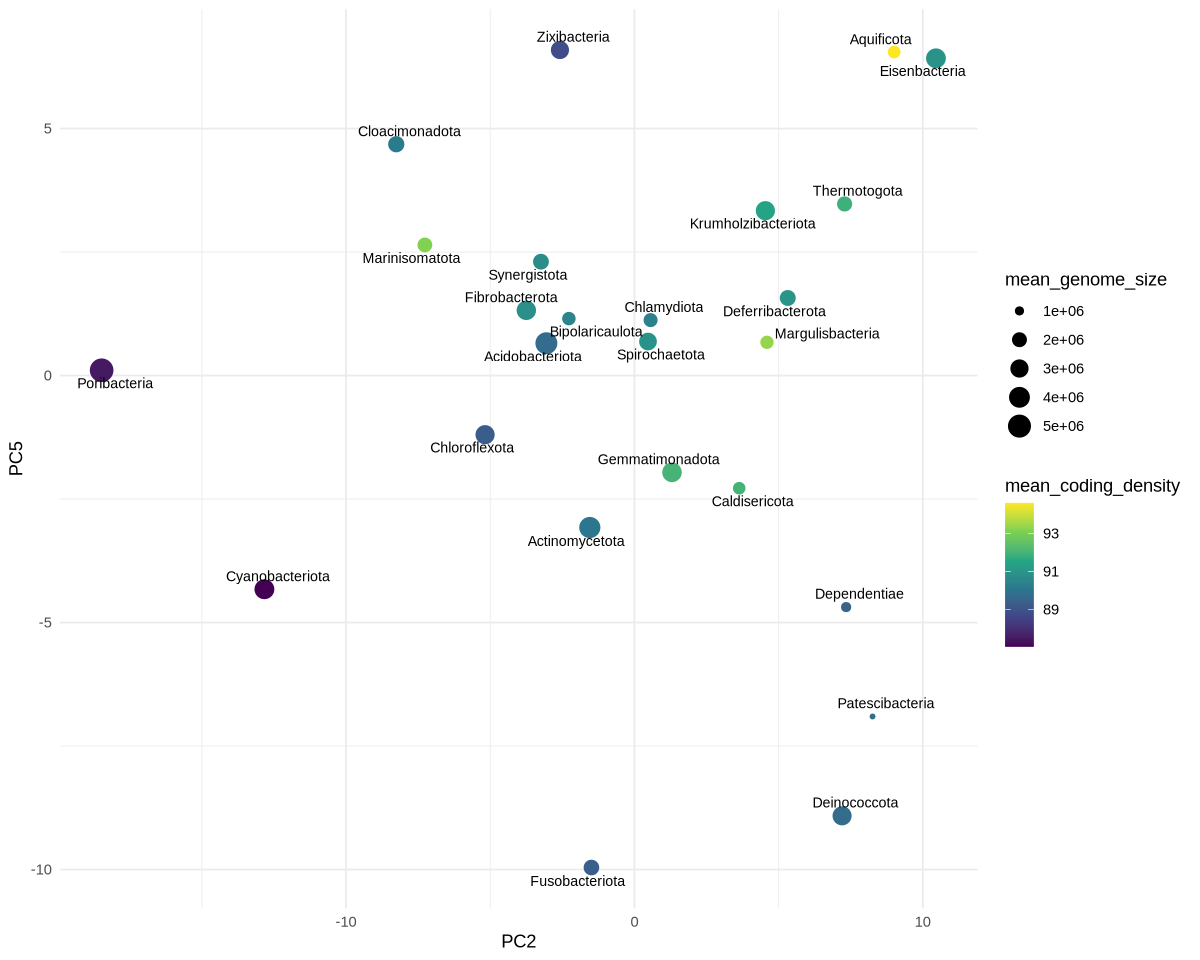

In [21]:
options(repr.plot.width=10, repr.plot.height=8)
# Load necessary libraries
library(tidyverse)
library(ggrepel)

# Function to plot PCA
# @description Plots PCA for given data
# @param data A data frame containing PCA data
# @param x_col The column name for x-axis
# @param y_col The column name for y-axis
# @param color_col The column name for color mapping (optional)
# @param size_col The column name for size of the points (optional)
plot_pca <- function(data, x_col, y_col, color_col = NULL, size_col = NULL) {
  p <- ggplot(data, aes(x = .data[[x_col]], y = .data[[y_col]])) +
    geom_point(aes(color = !!sym(color_col), size = !!sym(size_col))) +
    labs(x = x_col, y = y_col) +
    theme_minimal() +
    theme(legend.position = "right") +
    geom_text_repel(aes(label = GTDB_Phylum), size = 3, show.legend = FALSE, max.overlaps = Inf)
  
  if (!is.null(color_col)) {
    p <- p + scale_color_viridis_c()
  }
  
  return(p)
}

# Read the CSV file
pca_data <- read_csv("/home/tim/project/GTDB_TREE/analysis/model_and_genome/genome_numeric_stat_with_PCA_trained.csv")

# Plot PCA for 1-2 axes with color and size customization
plot_pca(pca_data, "PC1", "PC2", color_col = "mean_gc_percentage", size_col = "mean_genome_size")

# Plot PCA for 2-3 axes with color and size customization
plot_pca(pca_data, "PC2", "PC5", color_col = "mean_coding_density", size_col = "mean_genome_size")


In [22]:
filtered_meta_data %>%
  pull(ncbi_isolation_source) %>%
  table() %>%
  as.data.frame() %>%
  filter(Freq > 10) %>% 
  arrange(desc(Freq))


.,Freq
<fct>,<int>
none,12132
ruminant gastrointestinal tract,4124
feces,3587
groundwater,2857
soil,2841
lake water,2820
marine water,2167
human gut,1807
chicken caecal content,1650
